In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
DataDirectory= './images/train/'
Classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
img_size=224

## Imagenet work better with 224x224, so we are changing the size

In [3]:
training_Data = []

def create_training_data():
  for category in Classes:
    path = os.path.join(DataDirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array= cv2.imread(os.path.join(path, img))
        new_img = cv2.resize(img_array, (img_size, img_size))
        training_Data.append([new_img, class_num])
      except Exception as e:
        pass

In [5]:
create_training_data()

In [6]:
training_Data

[[array([[[72, 72, 72],
          [72, 72, 72],
          [72, 72, 72],
          ...,
          [40, 40, 40],
          [40, 40, 40],
          [40, 40, 40]],
  
         [[72, 72, 72],
          [72, 72, 72],
          [72, 72, 72],
          ...,
          [40, 40, 40],
          [40, 40, 40],
          [40, 40, 40]],
  
         [[72, 72, 72],
          [72, 72, 72],
          [72, 72, 72],
          ...,
          [40, 40, 40],
          [40, 40, 40],
          [40, 40, 40]],
  
         ...,
  
         [[77, 77, 77],
          [77, 77, 77],
          [77, 77, 77],
          ...,
          [81, 81, 81],
          [81, 81, 81],
          [81, 81, 81]],
  
         [[77, 77, 77],
          [77, 77, 77],
          [77, 77, 77],
          ...,
          [83, 83, 83],
          [82, 82, 82],
          [82, 82, 82]],
  
         [[77, 77, 77],
          [77, 77, 77],
          [77, 77, 77],
          ...,
          [83, 83, 83],
          [82, 82, 82],
          [82, 82, 82]]], dtype=u

In [7]:
import random
random.shuffle(training_Data)

In [8]:
x = []
y = []

for features, label in training_Data:
  x.append(features)
  y.append(label)

# x = np.array(x).reshape(-1, img_size, img_size, 3)
# x = np.array(x)

In [9]:
x = np.array(x).reshape(-1, img_size, img_size, 3)
x = np.array(x)

In [10]:
x.shape

(35475, 224, 224, 3)

In [11]:
y= np.array(y)
y.shape

(35475,)

In [12]:
model = tf.keras.applications.MobileNetV2()

In [13]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### Transfer learning- tuning, weights will start from last check point

In [14]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [15]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [16]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [17]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [18]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [19]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [20]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Normalizing the data
x=x/255.0

In [21]:
# x = x[:100]
# x = x/255.0
# y = y[:100]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
hist = new_model.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/15
3/3 [==============================] - 22s 3s/step - loss: 1.9886 - accuracy: 0.2250 - val_loss: 2.5732 - val_accuracy: 0.1000
Epoch 2/15
3/3 [==============================] - 8s 2s/step - loss: 1.1325 - accuracy: 0.7375 - val_loss: 3.1790 - val_accuracy: 0.1500
Epoch 3/15
3/3 [==============================] - 7s 2s/step - loss: 0.3739 - accuracy: 0.9750 - val_loss: 4.4396 - val_accuracy: 0.1000
Epoch 4/15
3/3 [==============================] - 7s 2s/step - loss: 0.1199 - accuracy: 1.0000 - val_loss: 5.9491 - val_accuracy: 0.1000
Epoch 5/15
3/3 [==============================] - 7s 2s/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 7.2385 - val_accuracy: 0.1000
Epoch 6/15
3/3 [==============================] - 8s 3s/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 8.4423 - val_accuracy: 0.1000
Epoch 7/15
3/3 [==============================] - 8s 3s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 9.5269 - val_accuracy: 0.1000
Epoch 8/15
3/3 [========================

<Figure size 640x480 with 0 Axes>

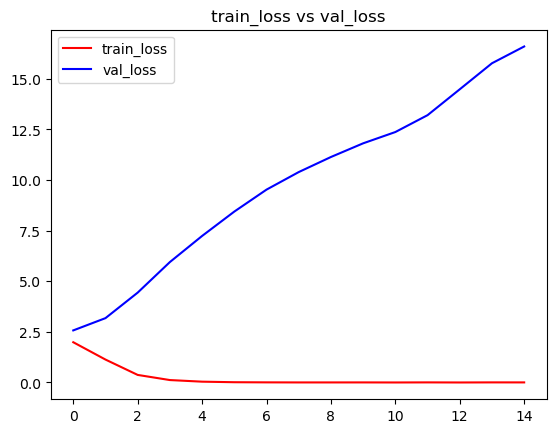

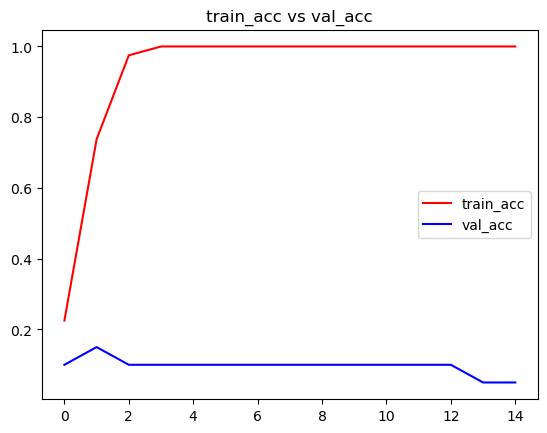

<Figure size 640x480 with 0 Axes>

In [24]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
results = hist.predict_classes(X_test)
cm = confusion_matrix(np.where(Y_test == 1)[1], results)
#cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]
import seaborn as sns
import pandas as pd

label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

final_cm = cm_df
final_cm
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

AttributeError: 'History' object has no attribute 'predict_classes'

In [26]:
new_model.save('model_keras.h5')